<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ragnar Betancourt Peraza (estudiante 1), Tania Bell Nicholls (estudiante 2).

**Fecha:** 08 de octubre del 2021.

**Expediente** : if717467, if726767.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Tania-Bell/Tarea6_TBell_RBetancourt.git

# Tarea 6: Clase 10

## Enunciado de tarea 

### Ejercicio 1: 

Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

In [ ]:
# Código de solución estudiante 1


Código de solución estudiante 2

$$p_i=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$

$$p_{i+1}=\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}$$

$$\longrightarrow\frac{p_{i+1}}{p_i}$$

$$\longrightarrow\frac{n!i!(n-i)!p^{i+1}(1-p)^{n-(i+1)}}{(i+1)!(n-(i+1))!n!p^i(1-p)^{n-i}}=\frac{i!(n-i)!p^{i+1}(1-p)^{n-(i+1)}}{(i+1)!(n-(i+1))!p^i(1-p)^{n-i}}$$

$$\longrightarrow\frac{i!(n-i)!p^{i+1}(1-p)^{n-(i+1)}p^{-1}(1-p)^{-n+i}}{(i+1)!(n-(i+1)!}=\frac{i!(n-i)!p}{(i+1)!(n-(i+1))!(1-p)}$$

$$\frac{i!}{(i+1)!}=\frac{1}{i+1}$$

$$\frac{(n-i)!}{(n-(i+1)!} = n-i$$

$$\longrightarrow\frac{p(n-i)}{(1-p)(i+1)}$$

$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p}p_i$$ 

### Ejercicio 2: 

Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

In [ ]:
# Código de solución estudiante 1


Código de solución estudiante 2

$$P(k+1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$

$$P(k)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

$$\longrightarrow\frac{P(k+1)}{P(k)}=\frac{e^{-\lambda}(\lambda)^{k+1}k!}{e^{-\lambda}(\lambda)^k(k+1)!}=\frac{(\lambda)^{k+1}k!}{(\lambda)^k(k+1)!}$$

$$\longrightarrow\frac{(\lambda)^{k+1-k}k!}{(k+1)!}=\frac{{\lambda}k!}{(k+1)!}$$

$$\frac{k!}{(k+1)!}=\frac{1}{k+1}\longrightarrow\frac{\lambda}{k+1}$$

$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

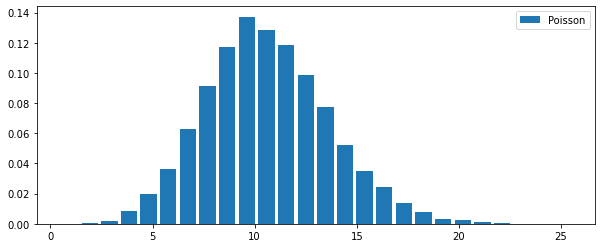

In [3]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()
    
def poisson(k, l):
    Pr = np.zeros(k)
    Pr[0] = (np.exp(-l))
    def pr(i):
        nonlocal Pr
        Pr[i + 1] = (l / (i + 1)) * Pr[i]
        
    [pr(i) for i in range(k - 1)]
    
    return np.cumsum(Pr)

N = 10000
k = 1000
l = 10
p = poisson(k,l)
dist_pois = Gen_distr_discreta(p, np.arange(0, k + 1), N)
plot_histogram_discrete(dist_pois, 'Poisson')

### Ejercicio 3: 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

El máximo de f es: [1.875]


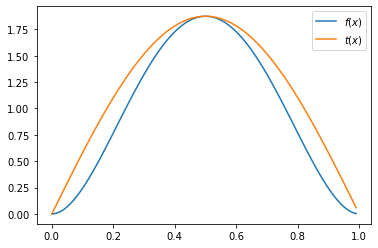

In [12]:
# solucion 1 estudiante 2
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
t = lambda x: max_f * np.sin(np.pi * x)

x = np.arange(0, 1, 0.01) 
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='$f(x)$')
plt.plot(x,t(x),label='$t(x)$')
plt.legend()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

In [13]:
# solucion 2 estudiante 2

$$g(x)=\frac{t(x)}{c}$$

$$max\_f=1.875\longrightarrow g(x)=\frac{1.875\sin(\pi x)}{\int_{0}^{1}1.875\sin(\pi x)dx}$$

$$g(x)=\frac{1.875\sin(\pi x)}{\frac{1.875}{\pi}\int_{0}^{1}\sin(u)du}$$

$$\longrightarrow\frac{1.875\sin(\pi x)}{\frac{1.875}{\pi}[2]}$$

$$g(x)=\frac{\pi}{2}\sin(\pi x)$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

In [ ]:
# solucion 3 estudiante 2

$$G(x) = \int_{0}^{x} \frac{\pi}{2} \sin{(\pi x)} dx$$

$$\longrightarrow\frac{\pi}{2} \frac{1}{\pi} \int \sin{(u)} du$$

$$\longrightarrow-\frac{1}{2} [\cos{(\pi x)} - 1]$$

$$\longrightarrow-\frac{1}{2}\cos{(\pi x)} + \frac{1}{2} = U$$

$$ \pi x = \cos^{-1}{(-2U + 1)}$$

$$ x = \frac{\cos^{-1}{(-2U + 1)}}{\pi}$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
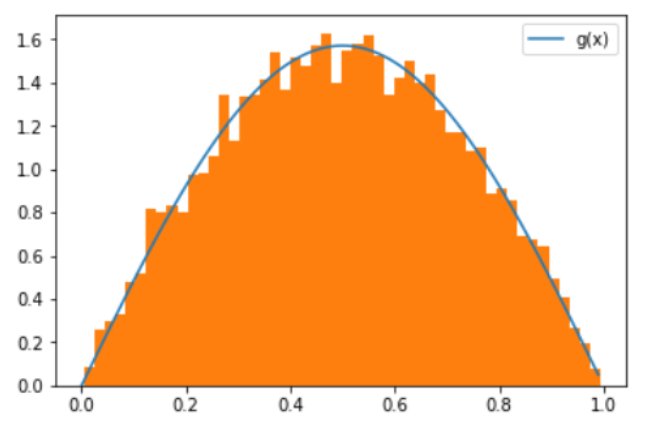

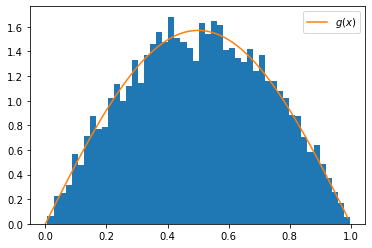

In [35]:
# solucion 4 estudiante 2
def g(N):
    Pr = np.zeros(N)
    def pr(i):
        nonlocal Pr
        Pr[i] = np.arccos(-2 * np.random.random() + 1) / np.pi
        
    [pr(i) for i in range(N)]
    return Pr
    

N=10000
g(N)
x = np.arange(0,1,0.01)
g_der = (np.pi / 2) * np.sin(np.pi * x)
plt.hist(g(N), bins=50, density = True)
plt.plot(x, g_der, label = '$g(x)$')
plt.legend()
plt.show()

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
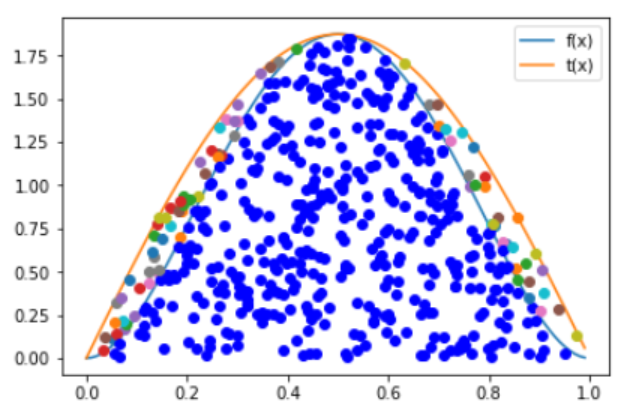

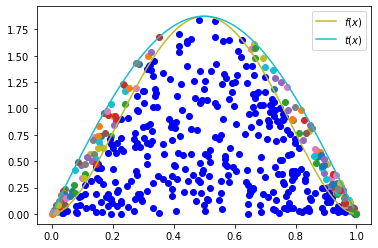

In [54]:
# solucion 5 estudiante 2
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
t = lambda x: max_f * np.sin(np.pi * x)
Acep_rechazo(R2,R1,f,t)
x = np.arange(0,1,0.01)
plt.plot(x,f(x), label='$f(x)$')
plt.plot(x,t(x), label='$t(x)$')
plt.legend()
plt.show()

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

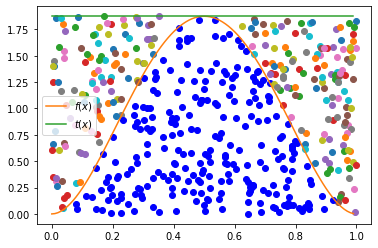

In [56]:
# solucion 6 estudiante 2
t_const = lambda x: max_f * np.ones([len(x)])
Acep_rechazo(R2,R1,f,t_const)
plt.plot(x,f(x), label='$f(x)$')
plt.plot(x,t_const(x), label='$t(x)$')
plt.legend()
plt.show()

In [57]:
def Acep_rechazo_p(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

x_const = Acep_rechazo_p(R2,R1,f,t_const)
x_sen = Acep_rechazo_p(R2,R1,f,t)
print('Porcentaje de puntos de aceptacion cuando se usa t(x) constante:', len(x_const)/N)
print('Porcentaje de puntos de aceptacion cuando se usa t(x) senoidal:', len(x_sen)/N)

Porcentaje de puntos de aceptacion cuando se usa t(x) constante: 0.498
Porcentaje de puntos de aceptacion cuando se usa t(x) senoidal: 0.664


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

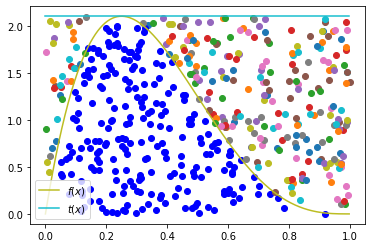

In [58]:
# solucion 7 estudiante 2
f = lambda x: 20 * x * (1 - x) ** 3
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False)) 
N = 500
x = np.arange(0,1,1/N)
t = lambda x: max_f * np.ones([len(x)])

R2 = np.random.rand(N) 
R1 = np.random.rand(N) 

va_x = Acep_rechazo(R2, R1, f, t)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, t(x), label='$t(x)$')
plt.legend()